<a href="https://colab.research.google.com/github/makhdoomAliGilani/Bank-Loan-Prediction/blob/master/Bank_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan prediction for Banks**

training the model on loan default data set provided by lendingClub. the model will be able to predict the potential clients that whom banks can give loan. thus minimizing the risk for loss.
---------------------------------
Algorithms used:
1. Logistic regrression
2. Random Forest
--------------------------------- 
In this code I have tried to done:
1. Exploratory Data Analysis
2. Data Cleaning:
    
Then in later code section is 
1. Model Training and evaluation.
2. prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import boxcox1p        
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('max_colwidth',500)

In [ ]:
data=pd.read_csv('/content/drive/My Drive/DM Project - loan prediction for Banks/loan_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42538 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

Dataset has 74 columns including the output columns 'loan_status'.

I created a dataframe from data dictionary so that evaluating each column will be easier. This dataframe shows feature name, decription, first value, data type and number of null values.

In [ ]:
data_dict=pd.read_excel('/content/drive/My Drive/DM Project - loan prediction for Banks/LCDataDictionary.xlsx',sheet_name='LoanStats')

In [ ]:
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [ ]:
data_dtypes=pd.DataFrame(data.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['LoanStatNew', 'dtype']
data_dtypes['first value'] = data.loc[0].values

In [ ]:
data_dtypes.head()

,LoanStatNew,dtype,first value
0,id,object,1077501
1,member_id,float64,1.2966e+06
2,loan_amnt,float64,5000
3,funded_amnt,float64,5000
4,funded_amnt_inv,float64,4975


In [ ]:
data_col=data_dtypes.merge(data_dict, on='LoanStatNew',how='left')

In [ ]:
data_col.head(2)

,LoanStatNew,dtype,first value,Description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.


In [ ]:
d={'LoanStatNew':[],'Nulls':[]}
for i in data.columns:
    d['LoanStatNew'].append(i)
    d['Nulls'].append(len(data[data[i].isnull()][i]))
data_col=data_col.merge(pd.DataFrame(d),on='LoanStatNew')
nulls=pd.DataFrame(d)

In [ ]:
data_col.head()

,LoanStatNew,dtype,first value,Description,Nulls
0,id,object,1077501,A unique LC assigned ID for the loan listing.,0
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.,3
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.",3
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.,3
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.,3


Now I am able to see info of each column. With this info I decided which column to delete from model.

## Exploratory Data Analysis:

Here I will go throught important features and analyse them. We'll use this information while data cleaning as well as training machine learning model.

In [ ]:
data_y=data['loan_status']

In [ ]:
data_y.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
data_y.value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
default=['Charged Off','Late (31-120 days)','Default']
data['loan_status']=data['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [ ]:
data_y.value_counts()

Fully Paid                                             34085
Default                                                 5672
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
In Grace Period                                            8
Late (16-30 days)                                          2
Name: loan_status, dtype: int64

In [ ]:
data=data[(data['loan_status']=='Default') | (data['loan_status']=='Fully Paid')]

In [ ]:
#Data is skewed with the ration of 21.84/78.16
data['loan_status'].value_counts()[0]/len(data['loan_status'])

0.8573332997962623

In [ ]:
#relation between average loan amount and loan status
data[['loan_amnt','loan_status']].groupby(by='loan_status').mean()

#Loan defaulters tend to apply for larger loans.

,loan_amnt
loan_status,
Default,12150.185120
Fully Paid,11073.361449


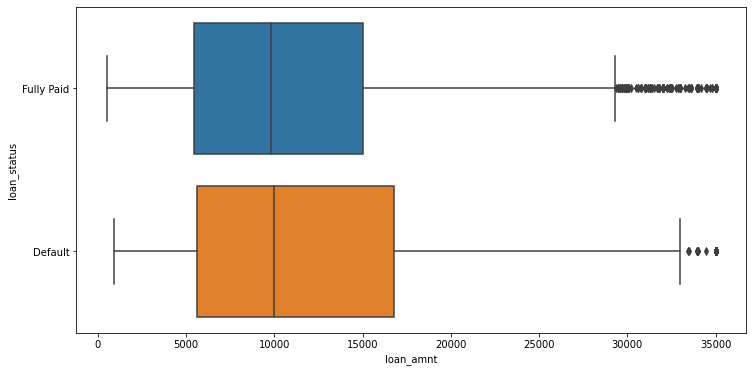

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data['loan_amnt'],data['loan_status'])

In [ ]:
# data.to_csv('DC1_1.csv',index=False)
# data=pd.read_csv('DC1_1.csv')

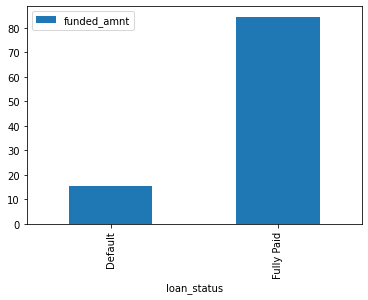

In [ ]:
total_funded_amnt=data['funded_amnt'].sum()
(data[['funded_amnt','loan_status']].groupby(by='loan_status').\
         sum()/total_funded_amnt*100).plot(kind='bar')

#Around 23% of funded amount is defaulted

In [ ]:
def get_default_rate_by_col(column):
    """
    Param:
        column: str, column for which default rate is to be calculated for it's unique values. Column must have limited
        unique values.
    """
    tmp=pd.DataFrame(data[data['loan_status']=='Default'][column].value_counts()/data[column].value_counts())
    tmp.columns=[column+'_Default_Rate']
    tmp=tmp.join(data[column].value_counts())
    tmp.columns=[column+'_Default_Rate',column+'_Count']
    return tmp

In [ ]:
# Create a column issue_year which has year in which the loan was issued.
data['issue_year']=data['issue_d'].apply(lambda x:int(x.split('-')[1]))

Text(0.5, 1.0, 'Default Rate Vs. Grade')

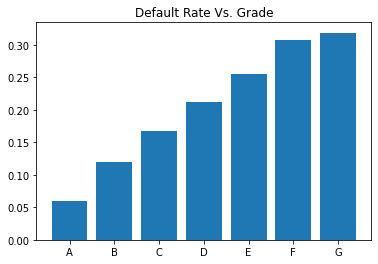

In [ ]:
default_rate_by_grade=get_default_rate_by_col('grade')
plt.bar(x=default_rate_by_grade.index,height=default_rate_by_grade['grade_Default_Rate'])
plt.title('Default Rate Vs. Grade')

Text(0.5, 1.0, 'Default Rate Vs. Issue Year')

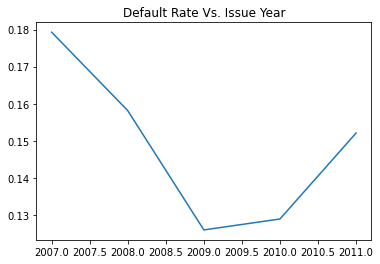

In [ ]:
default_rate_by_year=get_default_rate_by_col('issue_year')
plt.plot(default_rate_by_year['issue_year_Default_Rate'].sort_index())
plt.title('Default Rate Vs. Issue Year')

In [ ]:
#interest_by_grade=data[['int_rate','grade']].groupby('grade').mean()
#plt.bar(x=interest_by_grade.index,height=interest_by_grade['int_rate'])
#plt.title('Interest Rate Vs. Grade') # ERROR producing

In [ ]:
tmp=data[['total_pymnt','funded_amnt','loan_status','grade']]
roi=(tmp['total_pymnt'].sum()/tmp['funded_amnt'].sum()-1)*100
print("ROI:",round(roi,2))

ROI: 11.55


In [ ]:
tmp1=tmp.groupby('grade').sum()
ROI_by_grade=tmp1['total_pymnt']/tmp1['funded_amnt'] -1
ROI_by_grade

grade
A    0.072688
B    0.106086
C    0.120654
D    0.132662
E    0.162640
F    0.165291
G    0.171021
dtype: float64

In [ ]:
tmp=data[data['loan_status']=='Fully Paid'][['total_pymnt','funded_amnt','loan_status','grade']]
roi=(tmp['total_pymnt'].sum()/tmp['funded_amnt'].sum()-1)*100
print("ROI for fully paid loans:",round(roi,2))

ROI for fully paid loans: 21.06


In [ ]:
#Gradewise ROI for fully paid loans
tmp1=tmp.groupby('grade').sum()
fully_paid_ROI_by_grade=tmp1['total_pymnt']/tmp1['funded_amnt'] -1
fully_paid_ROI_by_grade

grade
A    0.101340
B    0.175704
C    0.230678
D    0.275927
E    0.348657
F    0.413595
G    0.433616
dtype: float64

# **Data Cleaning 1: Selecting relevant features**

In [ ]:
data_col[0:13]

,LoanStatNew,dtype,first value,Description,Nulls
0,id,object,1077501,A unique LC assigned ID for the loan listing.,0
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.,3
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.",3
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.,3
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.,3
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.,3
6,int_rate,object,10.65%,Interest Rate on the loan,3
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.,3
8,grade,object,B,LC assigned loan grade,3
9,sub_grade,object,B2,LC assigned loan subgrade,3


In [ ]:
#'grade' and 'sub_grade' gives same information
data.drop(['id','member_id','funded_amnt','funded_amnt_inv','installment','sub_grade','emp_title'],axis=1,inplace=True)

In [ ]:
data_col[13:26]

,LoanStatNew,dtype,first value,Description,Nulls
13,annual_inc,float64,24000,The self-reported annual income provided by the borrower during registration.,7
14,verification_status,object,Verified,"Indicates if income was verified by LC, not verified, or if the income source was verified",3
15,issue_d,object,Dec-2011,The month which the loan was funded,3
16,loan_status,object,Fully Paid,Current status of the loan,3
17,pymnt_plan,object,n,Indicates if a payment plan has been put in place for the loan,3
18,purpose,object,credit_card,A category provided by the borrower for the loan request.,3
19,title,object,Computer,The loan title provided by the borrower,16
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.,3
21,addr_state,object,AZ,The state provided by the borrower in the loan application,3
22,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.",3


In [ ]:
data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_year
0,5000.0,36 months,10.65%,B,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,2011
1,2500.0,60 months,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Default,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,2011
2,2400.0,36 months,15.96%,C,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Dec-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,2011
3,10000.0,36 months,13.49%,C,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,2011
5,5000.0,36 months,7.90%,A,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.00,Jan-2015,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,2011


In [ ]:
#removing url,desc to cover error
data.drop(['title','zip_code'],axis=1,inplace=True)
#Info in 'title' and 'purpose' is same

In [ ]:
data_col[26:39]

,LoanStatNew,dtype,first value,Description,Nulls
26,open_acc,float64,3,The number of open credit lines in the borrower's credit file.,32
27,pub_rec,float64,0,Number of derogatory public records,32
28,revol_bal,float64,13648,Total credit revolving balance,3
29,revol_util,object,83.7%,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.",93
30,total_acc,float64,9,The total number of credit lines currently in the borrower's credit file,32
31,initial_list_status,object,f,"The initial listing status of the loan. Possible values are – W, F",3
32,out_prncp,float64,0,Remaining outstanding principal for total amount funded,3
33,out_prncp_inv,float64,0,Remaining outstanding principal for portion of total amount funded by investors,3
34,total_pymnt,float64,5863.16,Payments received to date for total amount funded,3
35,total_pymnt_inv,float64,5833.84,Payments received to date for portion of total amount funded by investors,3


In [ ]:
# removed 'mths_since_last_delinq','mths_since_last_record', to cover error
data.drop(['out_prncp','out_prncp_inv','total_pymnt'],
          axis=1,inplace=True)

In [ ]:
data_col[39:52]

,LoanStatNew,dtype,first value,Description,Nulls
39,recoveries,float64,0,post charge off gross recovery,3
40,collection_recovery_fee,float64,0,post charge off collection fee,3
41,last_pymnt_d,object,Jan-2015,Last month payment was received,86
42,last_pymnt_amnt,float64,171.62,Last total payment amount received,3
43,last_credit_pull_d,object,Dec-2016,The most recent month LC pulled credit for this loan,7
44,collections_12_mths_ex_med,float64,0,Number of collections in 12 months excluding medical collections,148
45,policy_code,float64,1,publicly available policy_code=1\nnew products not publicly available policy_code=2,3
46,application_type,object,INDIVIDUAL,Indicates whether the loan is an individual application or a joint application with two co-borrowers,3
47,acc_now_delinq,float64,0,The number of accounts on which the borrower is now delinquent.,32
48,chargeoff_within_12_mths,float64,0,Number of charge-offs within 12 months,148


In [ ]:
# remvoed ,'next_pymnt_d','mths_since_last_major_derog'
data.drop(['total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
          'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','policy_code'
          ],
          axis=1,inplace=True)

In [ ]:
data_col[52:65]

,LoanStatNew,dtype,first value,Description,Nulls


In [ ]:
# Drop any column with more than 50% missing values
data = data.dropna(thresh=(len(data)/2),axis=1) 

In [ ]:
data_col[65:]
#These columns are already removed as they have more than 50% null values (except total_hi_rev_lim)

,LoanStatNew,dtype,first value,Description,Nulls


# **Data Cleaning 2: Null imputation**

In [ ]:
# data.to_csv('data_dc1.csv',index=False)

In [ ]:
# data=pd.read_csv('data_dc1.csv')
# data.head()

I calculated percent null values in each column.
1. Columns with null values : 'emp_length', 'revol_util', 'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
2. As 'emp_length' is ordinal variable, I encoded it according to value instead of creating dummy binary variables. 'emp_length' less that one year was set to 0 and that greater than 10 years was set to 10.
3. 'tot_coll_amt','tot_cur_bal','total_rev_hi_lim' have missing values till Sept-2012 date.
4. Other variables do not show any pattern in missing values

Check histograms of these columns. All of them are skewed with wide outliers.

In [ ]:
nulls_percent=[]
for i in data.columns:
    tmp=len(data[data[i].isnull()])/len(data)*100
    nulls_percent.append(round(tmp,2))
null_df=pd.DataFrame(data=nulls_percent,index=data.columns,columns=['% Nulls'])
null_df[null_df['% Nulls']!=0]

In [ ]:
columns_with_nulls=['emp_length','revol_util','collections_12_mths_ex_med',\
                    'tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [ ]:
data['emp_length'].unique()

In [ ]:
def encode_emp_length(x):
    if type(x)==float: #Check for nan ,as only Nans are float while other values are str
        return x
    if x=='10+ years':
        return 10
    if x=='< 1 year':
        return 0
    else:
        return int(x.split(' ')[0])
    
data['emp_length']=data['emp_length'].apply(encode_emp_length)

In [ ]:
# data=pd.read_csv('DC2.csv')
# data.head()

In [ ]:
# data.info()

In [ ]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
data['grade'].value_counts()

B    12030
A    10085
C     8105
D     5318
E     2851
F     1051
G      317
Name: grade, dtype: int64

In [ ]:
#home_ownership
data['home_ownership'].value_counts()

RENT        18901
MORTGAGE    17691
OWN          3064
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

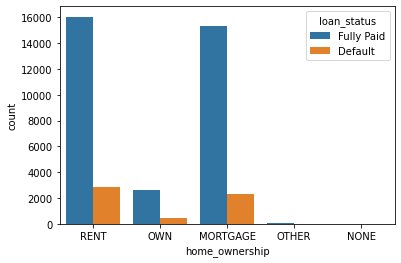

In [ ]:
sns.countplot(x='home_ownership',hue='loan_status',data=data)

In [ ]:
#Change OHTER, NONE, ANY to RENT as these data points are too low.
data['home_ownership']=data['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE','ANY'] else x)

In [ ]:
#verification_status
data['verification_status'].value_counts()

Not Verified       16923
Verified           12825
Source Verified    10009
Name: verification_status, dtype: int64

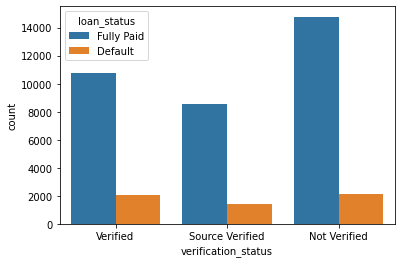

In [ ]:
sns.countplot(x='verification_status',hue='loan_status',data=data)

In [ ]:
#pymnt_plan
print(data['pymnt_plan'].value_counts())
data.drop('pymnt_plan',axis=1,inplace=True)

n    39757
Name: pymnt_plan, dtype: int64


In [ ]:
#purpose
print("Unique values in purpose column:",data['purpose'].nunique())
data['purpose'].value_counts()

Unique values in purpose column: 14


debt_consolidation    18657
credit_card            5133
other                  3999
home_improvement       2984
major_purchase         2187
small_business         1829
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [ ]:
#Get the defalut rate for each laon purpose.
get_default_rate_by_col('purpose')
#Loans for small_business are highly probable to default.

,purpose_Default_Rate,purpose_Count
car,0.103159,1551
credit_card,0.106760,5133
debt_consolidation,0.149756,18657
educational,0.172308,325
home_improvement,0.117627,2984
house,0.154450,382
major_purchase,0.101509,2187
medical,0.152518,695
moving,0.157804,583
other,0.159290,3999


In [ ]:
#addr_state
print("Number of unique values in addr_state column:",data['addr_state'].nunique())
# data['addr_state'].value_counts()

Number of unique values in addr_state column: 50


In [ ]:
default_rate_by_state=get_default_rate_by_col('addr_state')['addr_state_Default_Rate'].sort_values()

In [ ]:
#Consider states with significant loan applications
# default_rate_by_state[data['addr_state'].value_counts()>1000]

In [ ]:
#Check default rate per year per state
tmp1=data.groupby(by=['issue_year','addr_state']).count()['loan_amnt']
tmp2=data[data['loan_status']=='Default'].groupby(by=['issue_year','addr_state']).count()['loan_amnt']
default_rate_by_year_state=pd.DataFrame(tmp2/tmp1)
default_rate_by_year_state=default_rate_by_year_state.reset_index()
default_rate_by_year_state=default_rate_by_year_state.sort_values(by=['issue_year','loan_amnt'],ascending=[True,False])
default_rate_by_year_state=pd.DataFrame(default_rate_by_year_state)

#Add count of rows for each state to the dataframe
tmp=pd.DataFrame(data['addr_state'].value_counts())
tmp.columns=['count']
tmp.reset_index(inplace=True)
tmp.columns=['addr_state','count']
default_rate_by_year_state=pd.merge(default_rate_by_year_state,tmp,how='left',on='addr_state')
pd.DataFrame(default_rate_by_year_state).to_csv('default_rate_by_yar_state.csv',index=False)


In [ ]:
#From above dataframe
states_to_keep=['FL','NY','LA','NV','IN','CA','IL','GA','TX']

#Create dummy variables for these states
for i in states_to_keep:
    data['state'+i]=data['addr_state'].apply(lambda x: 1 if x==i else 0)
data.drop('addr_state',axis=1,inplace=True)

f    39757
Name: initial_list_status, dtype: int64


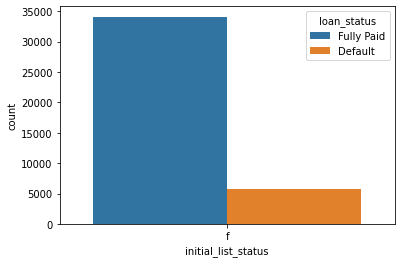

In [ ]:
#initial_list_status
print(data['initial_list_status'].value_counts())
sns.countplot(x='initial_list_status',hue='loan_status',data=data)

In [ ]:
print(get_default_rate_by_col('initial_list_status'))

data.drop('initial_list_status',axis=1,inplace=True)

   initial_list_status_Default_Rate  initial_list_status_Count
f                          0.142667                      39757


In [ ]:
#application_type
print(data['application_type'].value_counts())
data.drop('application_type',axis=1,inplace=True)

INDIVIDUAL    39757
Name: application_type, dtype: int64


In [ ]:
#earliest_cr_line

#Change 'issue_d' and 'earliest_cr_line ' to datetime
from datetime import datetime as dt
data['issue_d']=data['issue_d'].apply(lambda x:dt.strptime('01-'+x,'%d-%b-%Y').date())
data['earliest_cr_line']=data['earliest_cr_line'].apply(lambda x:dt.strptime('01-'+x,'%d-%b-%Y').date())

In [ ]:
data['earliest_cr_line']=data['issue_d']-data['earliest_cr_line']
data['earliest_cr_line']=data['earliest_cr_line'].apply(lambda x:int(str(x).split(' ')[0]))

In [ ]:
#Divide 'annual_inc','tot_cur_bal','total_rev_hi_lim','revol_bal' by 'loan_amnt'
tmp=['annual_inc','revol_bal']
for col in tmp:
    data[col]=data[col]/data['loan_amnt']

In [ ]:
#Create dummy variables for categorical columns
cat_cols=['term','grade','home_ownership','verification_status','purpose']
for col in cat_cols:
    data=data.join(pd.get_dummies(data[col],drop_first=True))
data.drop(cat_cols,axis=1,inplace=True)

In [ ]:
# collections_12_mths_ex_med
# get_default_rate_by_col('collections_12_mths_ex_med')

In [ ]:
data.drop('collections_12_mths_ex_med',axis=1,inplace=True)

In [ ]:
# data.to_csv('DC3.csv',index=False)

In [ ]:
# data=pd.read_csv('DC3.csv')
# data.head()

As an example I will explain how did I handle outliers for columns : 

**1. int_rate**

#get_default_rate_by_col('int_rate')

As interest rate increases, default rate is also increasing. So, outliers in this case can be helpful to predict defaulter.

For interest rate > 25 around 50% loans are default.

So, I've transformed this feature.

In [ ]:
#int_rate

#The points outside the whiskers of boxplot represents outliers.

In [ ]:
data[data['int_rate']>'25']['loan_status'].value_counts()

Series([], Name: loan_status, dtype: int64)

In [ ]:
#sns.distplot(data['int_rate'])

In [ ]:
#sns.distplot(data['int_rate'].apply(lambda x: np.log1p(x)**2))

In [ ]:
#data['int_rate']=data['int_rate'].apply(lambda x: np.log1p(x)**2)#

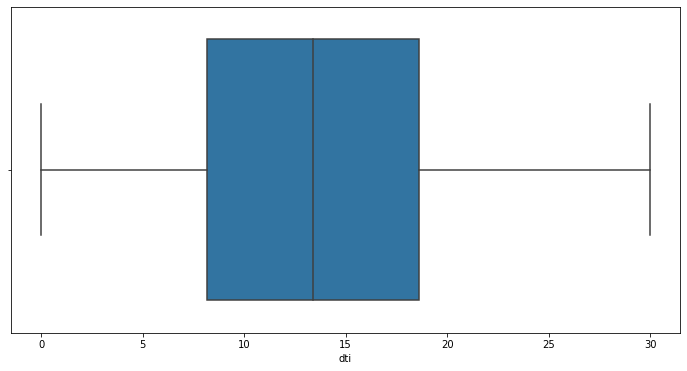

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.boxplot(x='dti',data=data,ax=ax)

In [ ]:
data=data[data['dti']<40].reset_index(drop=True)

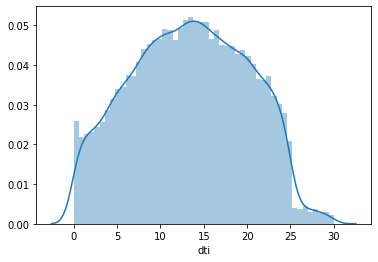

In [ ]:
sns.distplot(data['dti'])

In [ ]:
# data=pd.read_csv('DC4.csv')
# data.head()

In [ ]:
y=data['loan_status'].apply(lambda x: 1 if x=='Default' else 0)

In [ ]:
data.drop(['loan_status','issue_d','issue_year'],axis=1,inplace=True)

In [ ]:
# remove_by_vif(data)

In [ ]:
columns_removed_by_vif=['loan_amnt','int_rate','annual_inc','total_acc','revol_bal',
                        'debt_consolidation','total_rev_hi_lim','tot_cur_bal','open_acc'
                        'revol_util','earliest_cr_line',]

# **Model Training and Evaluation:**
training a machine learning model to predict potential loan defaulters.

1. Data Prepocessing
2. Training ML Model
3. Evaluating Model on Test Data
4. Learning Cuvre and Scope for Improvement

**Imports and Functions**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import boxcox1p     
import joblib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing custom classes and functions
import sys
sys.path.insert(0, '/content/drive/My Drive/DM Project - loan prediction for Banks/lending_club')
from data_cleaning import * 


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve,StratifiedKFold

In [ ]:
def create_performance_chart(data,y_pred,y_test):
    picked=data.loc[y_pred==0]
    grades=['A','B','C','D','E','F','G']
    tmp=pd.DataFrame(columns=['ROI','% Picked','% Default'],index=grades)
    for g in grades:
        grade_picked=picked[picked['grade']==g]
        if len(grade_picked.index)==0:
            roi=None
            default_rate=None
            perc_picked=0
        else:
            num_picked=len(grade_picked.index)
            num_total=len(data[data['grade']==g].index)
            roi=sum(grade_picked['total_pymnt'])/sum(grade_picked['funded_amnt'])-1
            l=y_test[list(grade_picked.index)]
            default_rate=100*len(l[l==1])/len(l)
            perc_picked=100*num_picked/num_total

        tmp.loc[g,'% Picked']=perc_picked
        tmp.loc[g,'ROI']=roi
        tmp.loc[g,'% Default']=default_rate
    return tmp

# **Data Preprocessing (Project working fine until here)**
To be done!
1. Selected only Fully Paid  and Defaulted loans for training model.
2. Train-Test Split
3. Created a pipeline for data preprocessing. 
4. Standard Scaling.

In [ ]:
data=pd.read_csv('/content/drive/My Drive/DM Project - loan prediction for Banks/loan_data.csv')

# Select only default or paid loans. Ignore current loans
default=['Charged Off','Late (31-120 days)','Default',
             'Does not meet the credit policy. Status:Charged Off','Late (16-30 days)',
                 'In Grace Period']
paid=['Fully Paid',
              'Does not meet the credit policy. Status:Fully Paid']

data['loan_status']=data['loan_status'].apply(lambda x: 'Default' if x in default else x)
data['loan_status']=data['loan_status'].apply(lambda x: 'Fully Paid' if x in paid else x)
data=data[(data['loan_status']=='Default') | (data['loan_status']=='Fully Paid')]
y=data['loan_status'].apply(lambda x: 1 if x=='Default' else 0)
data.drop('loan_status',axis=1,inplace=True)

In [ ]:
# Train-Test Split (Stratified)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y,random_state=42)

In [ ]:
# Creating pipeline for data preprocessing

selected_featues=['loan_amnt', 'term', 'int_rate',
                  'grade',#'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status','issue_d', 
        'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

num_features= ['loan_amnt', 'int_rate', 'emp_length','annual_inc',
       'dti','delinq_2yrs','inq_last_6mths','revol_bal', 'revol_util',
       'total_acc','open_acc','pub_rec','acc_now_delinq','tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

dummy_cols=['term','grade','home_ownership','verification_status','purpose']

states_to_keep=['FL','NY','LA','NV','IN','CA','IL','GA','TX']

features_to_scale=['loan_amnt', 'int_rate', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq']
Pipeline=([
    ('selector',DataFrameSelector(selected_featues)),
    ('misc_fe',Misc_Feature_Engineering()),
    ('median_imp',Median_Imputer(num_features)),
    ('dummy_vars',Dummy_Variables(states_to_keep=states_to_keep,cat_cols=dummy_cols)),
    ('tranform_features',Transform_Skewed_Features())
])
pipeline=Pipeline

In [ ]:

#X_train=pipeline.fit_transform(X_train)
# Scaling
scaler=StandardScaler()
#X_train[features_to_scale]=scaler.fit_transform(X_train[features_to_scale])

# Training Model **(Some Errors occuring !)**
Models:

1. Logistic Regression
2. Random Forest
3. LightGBM
Final Model:

Hard voting of above three models (Defaulter if all three models predict as defaulter)

In [ ]:
# Linear Regression
lr=LogisticRegression(C=10,tol=0.0001,random_state=51,n_jobs=-1,solver='liblinear',class_weight='balanced')
lr.fit(X_train,y_train)

ValueError: ignored

In [ ]:
# Random Forest
rfc=RandomForestClassifier(n_estimators=150,max_depth=14,max_leaf_nodes= None, 
                           min_impurity_decrease= 1e-05, min_samples_leaf= 100,
                           class_weight='balanced',n_jobs=-1,random_state=51)
rfc.fit(X_train,y_train)

ValueError: ignored

In [ ]:
# LGBM
lgb=LGBMClassifier(random_state=51, class_weight= {0: 1, 1: 4}, colsample_bytree=1, max_depth=7,
 min_child_samples=20, min_split_gain=0, n_estimators=100, reg_alpha=13)
lgb.fit(X_train,y_train)


# Predicting on test data (**cannot procedd due to previous ERRORS :(**  )


In [ ]:
# Preprocessing Test Data
X_test_1=X_test.copy()
X_test=pipeline.transform(X_test)
X_test[features_to_scale]=scaler.transform(X_test[features_to_scale])

# Linear Regression
y_test_pred_lr=lr.predict(X_test)

# Random Forest
y_test_pred_rfc=rfc.predict(X_test)

# LightGBM
y_test_pred_lgb=lgb.predict(X_test)

NameError: ignored